# MLOPS assignment 222885K

### Dataset 1
#### Business Objective: You are tasked to train an ML model to predict the selling price of a property in Melbourne based on its characteristics e.g. distance to the Central Business District (CBD), land size, number of bedrooms, building area, age of the property etc.

Data Source: 01_Melbourne_Residential.csv

# EDA

In [1]:
!pip install pycaret mlflow hydra-core dvc

In [2]:
#import pandas to ingest data
import pandas as pd

#ingest the csv file
df = pd.read_csv("01_Melbourne_Residential.csv")

#first 5 rows
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,S,Brace,3/9/2023,6.4,3078,...,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


In [3]:
#dataframe shape
print(df.shape)

(13580, 21)


In [4]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   Seller         13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
#describe the data
print(df.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241   

In [6]:
#display null values
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
Seller              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Region              0
Propertycount       0
dtype: int64

In [7]:
#show any duplicated rows
df.duplicated().sum()

0

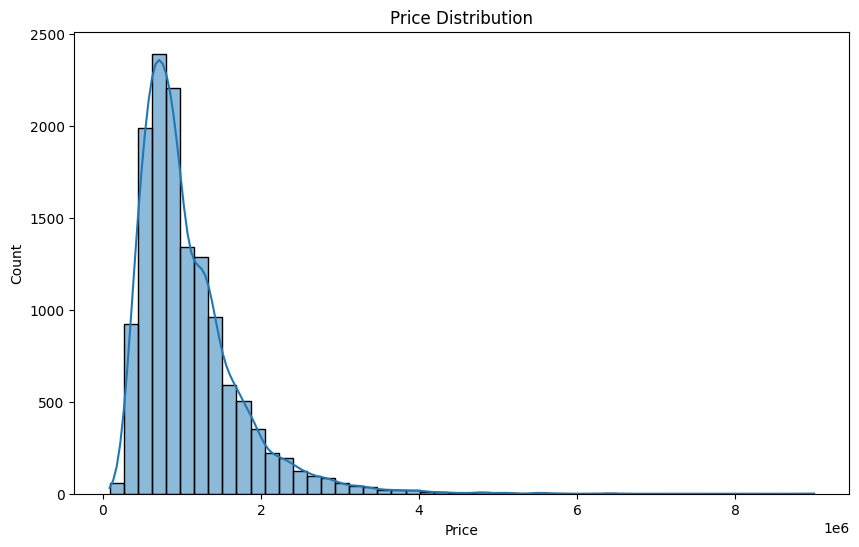

In [8]:
#import visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns

#show price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

Right skewed distribution for Price distribution, good for converting values to logarithmic form for better MAE, MSE etc.

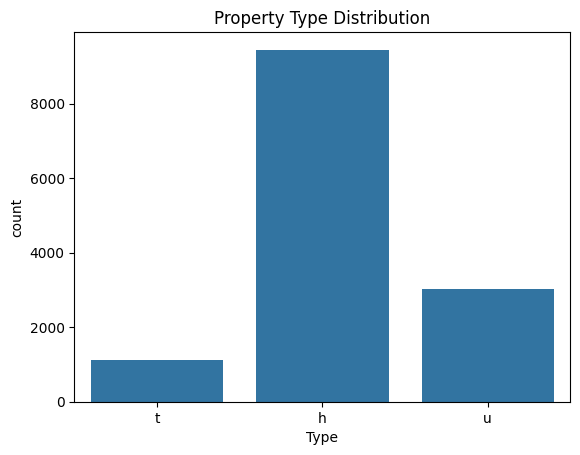

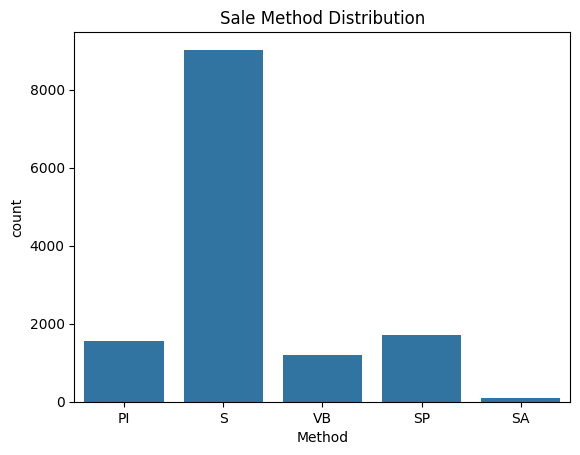

In [9]:
#show property type distribution
sns.countplot(x='Type', data=df)
plt.title("Property Type Distribution")
plt.show()

#show sale method distribution
sns.countplot(x='Method', data=df)
plt.title("Sale Method Distribution")
plt.show()

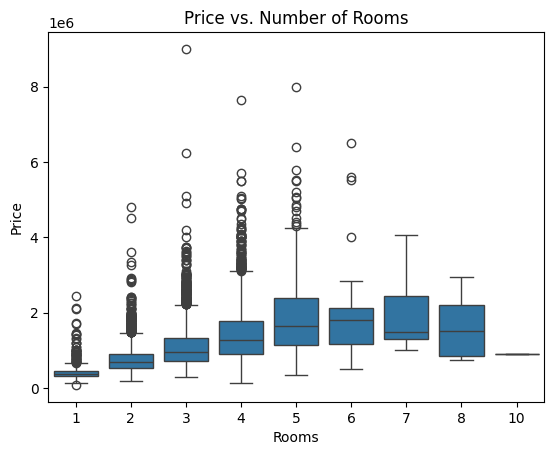

In [10]:
#show correlation between number of rooms and price
sns.boxplot(x='Rooms', y='Price', data=df)
plt.title("Price vs. Number of Rooms")
plt.show()

This clearly shows that in general, the more rooms there are, the higher the price for the property is

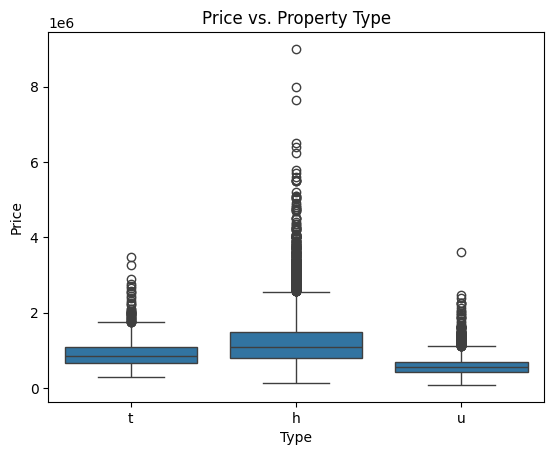

In [11]:
#shows the correlation between the property type and the price
sns.boxplot(x='Type', y='Price', data=df)
plt.title("Price vs. Property Type")
plt.show()

shows the typical standard landed property has the greater range of prices

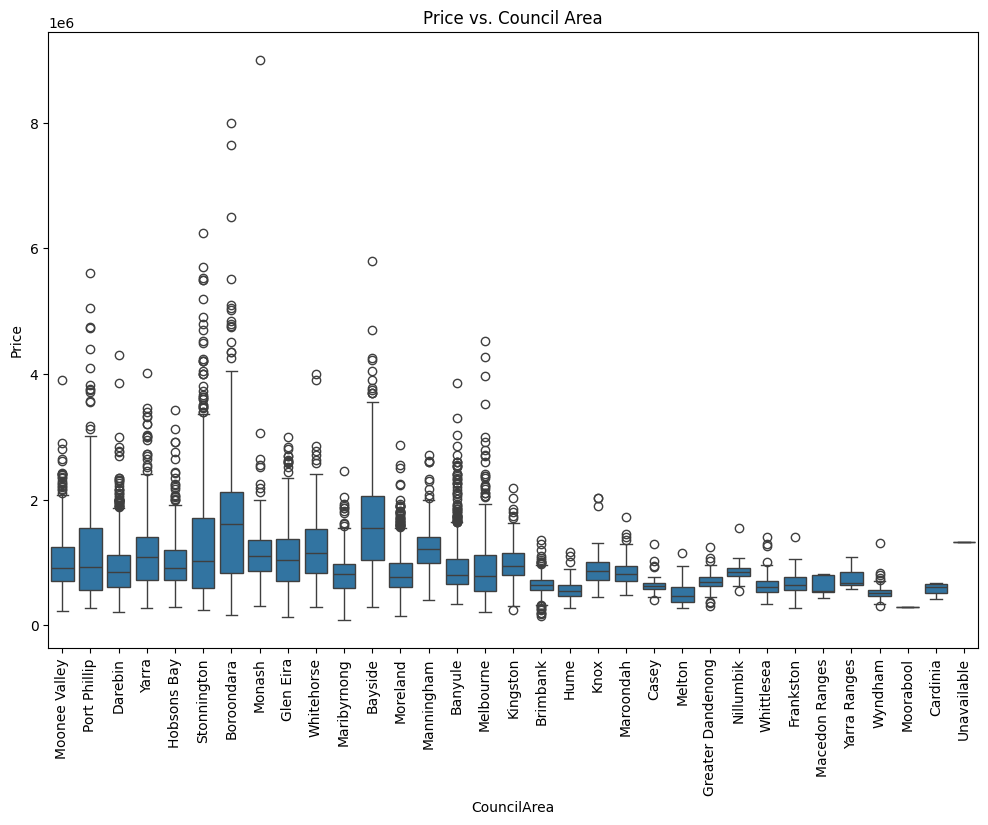

In [12]:
#shows the range of prices for each CouncilArea
plt.figure(figsize=(12,8))
sns.boxplot(x='CouncilArea', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Price vs. Council Area")
plt.show()

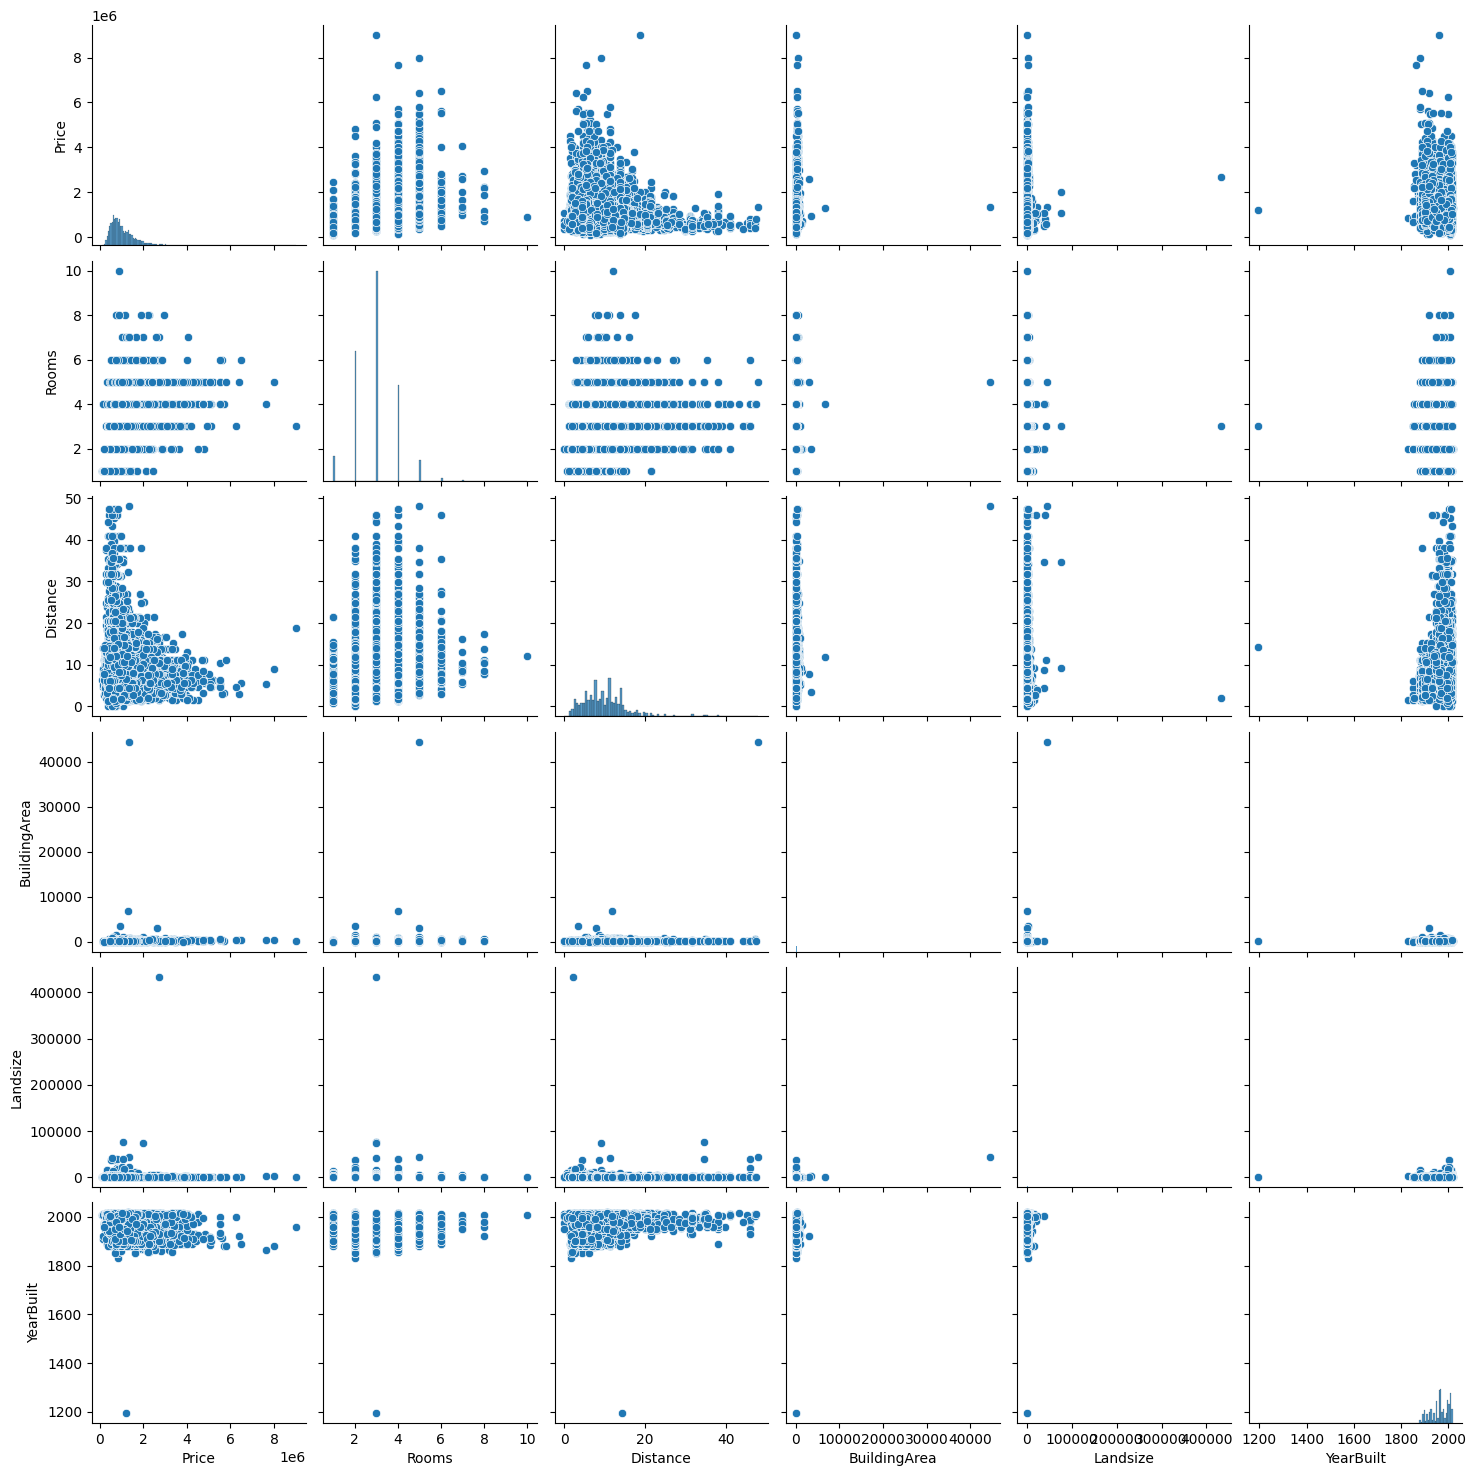

In [13]:
#shows correlation between numerical values
sns.pairplot(df[['Price', 'Rooms', 'Distance', 'BuildingArea', 'Landsize', 'YearBuilt']])
plt.show()

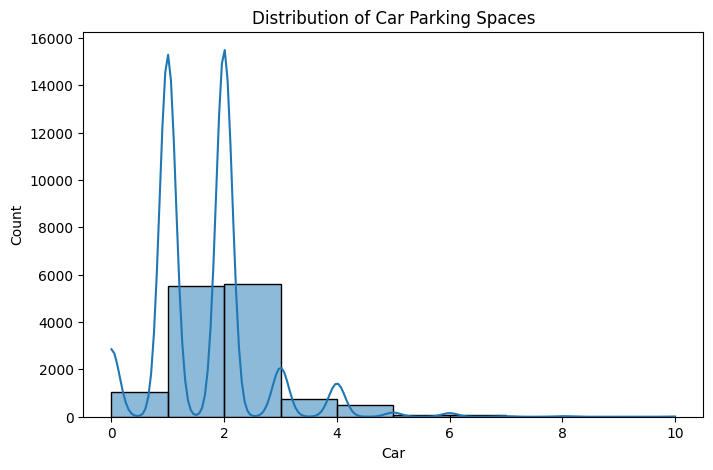

In [14]:
#shows distribution of parking spots
plt.figure(figsize=(8, 5))
sns.histplot(df['Car'].dropna(), bins=10, kde=True)
plt.title("Distribution of Car Parking Spaces")
plt.show()

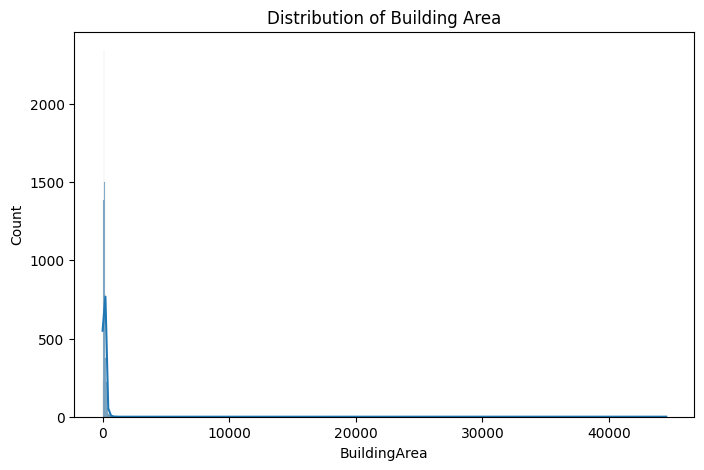

In [15]:
#shows distribution of the building area
plt.figure(figsize=(8, 5))
sns.histplot(df['BuildingArea'].dropna(), bins=1000, kde=True)
plt.title("Distribution of Building Area")
plt.show()

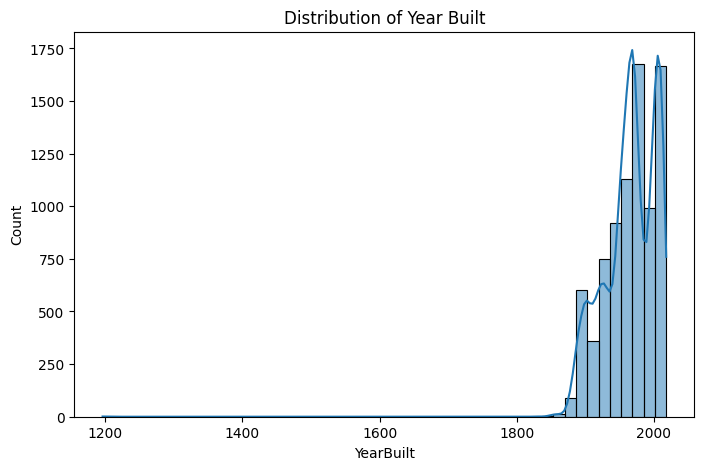

In [16]:
#distribution of year built
plt.figure(figsize=(8, 5))
sns.histplot(df['YearBuilt'].dropna(), bins=50, kde=True)
plt.title("Distribution of Year Built")
plt.show()

In [17]:
print(df['CouncilArea'].value_counts(dropna=False))

CouncilArea
NaN                  1369
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: count, dtype: int64


## Preprocessing

In [18]:
# Group by Region and get the mode of CouncilArea
mode_councilarea_by_region = df.groupby('Region')['CouncilArea'].agg(lambda x: x.mode()[0])

# Create a dictionary that maps Region to its corresponding mode of CouncilArea
mode_councilarea_dict = mode_councilarea_by_region.to_dict()

# Fill missing values in 'CouncilArea' based on the mode of the corresponding Region
df['CouncilArea'] = df.apply(lambda row: mode_councilarea_dict.get(row['Region'], row['CouncilArea']) 
                             if pd.isnull(row['CouncilArea']) else row['CouncilArea'], axis=1)

# Verify the changes
df['CouncilArea'].isnull().sum()  # Check how many missing values remain

0

In [19]:
from pycaret.regression import *
import numpy as np

# Define categorical and numerical features manually
categorical_features = ['Suburb', 'Type', 'Method', 'Region', 'CouncilArea']
numerical_features = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price']

#convert to log as pycaret does not have its own log function
df['Price'] = np.log1p(df['Price'])

# Set up PyCaret regression with features
regression_setup = setup(data=df, target='Price', session_id=123, 
                         ignore_features=['Seller', 'Lattitude', 'Longtitude', 'Address', 'Date', 'Postcode', 'Propertycount'],
                         categorical_features=categorical_features,
                         numeric_imputation='median')


,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(13580, 21)"
4,Transformed data shape,"(13580, 27)"
5,Transformed train set shape,"(9506, 27)"
6,Transformed test set shape,"(4074, 27)"
7,Ignore features,7
8,Numeric features,8
9,Categorical features,5


In [20]:
# To view the columns of the preprocessed data
preprocessed_data = get_config('X_train')
print(preprocessed_data.columns)

Index(['Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Region'],
      dtype='object')


In [21]:
print(preprocessed_data.head())

              Suburb  Rooms Type Method  Distance  Bedroom2  Bathroom  Car  \
697     Surrey Hills      3    h      S      11.2         3         2  2.0   
9836      Cheltenham      3    h      S      17.9         3         2  2.0   
2814       Brunswick      4    h     PI       5.2         4         1  2.0   
8588  Bentleigh East      3    h      S      13.9         3         1  2.0   
7339   Brighton East      3    h      S      10.7         4         3  2.0   

      Landsize  BuildingArea  YearBuilt CouncilArea                 Region  
697       1255           NaN        NaN  Whitehorse  Southern Metropolitan  
9836       534         134.0     1980.0  Boroondara  Southern Metropolitan  
2814       678         177.0     1900.0    Moreland  Northern Metropolitan  
8588       625           NaN        NaN   Glen Eira  Southern Metropolitan  
7339       435         228.0     1915.0     Bayside  Southern Metropolitan  


In [22]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,13.641158,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,14.058458,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,14.190517,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,14.508658,S,Brace,3/9/2023,6.4,3078,...,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,13.919871,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


In [23]:
# Drop the unnecessary columns as you did in PyCaret setup
df = df.drop(columns=['Seller', 'Lattitude', 'Longtitude', 'Address', 'Date', 'Postcode', 'Propertycount', 'Price'])

# Save the cleaned dataframe to a new CSV file
df.to_csv('input_data_for_predictions.csv', index=False)


## Train Models

In [24]:
#compare all models and search for the best performing model
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1381,0.0341,0.1844,0.8756,0.0125,0.0100,0.8500
lightgbm,Light Gradient Boosting Machine,0.1444,0.0371,0.1925,0.8643,0.0130,0.0105,0.1070
xgboost,Extreme Gradient Boosting,0.1462,0.0385,0.1960,0.8594,0.0132,0.0106,0.1680
rf,Random Forest Regressor,0.1502,0.0410,0.2022,0.8503,0.0137,0.0109,0.4300
et,Extra Trees Regressor,0.1552,0.0437,0.2089,0.8403,0.0141,0.0113,0.3420
gbr,Gradient Boosting Regressor,0.1597,0.0440,0.2096,0.8393,0.0142,0.0116,0.1280
ridge,Ridge Regression,0.2002,0.0681,0.2608,0.7513,0.0176,0.0146,0.0260
br,Bayesian Ridge,0.2002,0.0681,0.2607,0.7513,0.0176,0.0146,0.0260
lr,Linear Regression,0.2002,0.0681,0.2608,0.7512,0.0177,0.0146,0.6780
lar,Least Angle Regression,0.2002,0.0681,0.2608,0.7512,0.0177,0.0146,0.0280


In [25]:
#automatically tune the best performing model which in this case is the catboost
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1355,0.0342,0.1850,0.8759,0.0125,0.0098
1,0.1442,0.0355,0.1885,0.8780,0.0128,0.0105
2,0.1511,0.0438,0.2093,0.8526,0.0142,0.0110
3,0.1467,0.0385,0.1962,0.8592,0.0132,0.0106
4,0.1389,0.0345,0.1858,0.8654,0.0126,0.0101
5,0.1407,0.0353,0.1878,0.8669,0.0126,0.0102
6,0.1335,0.0301,0.1736,0.8884,0.0117,0.0097
7,0.1435,0.0350,0.1870,0.8681,0.0126,0.0104
8,0.1359,0.0338,0.1837,0.8728,0.0124,0.0099


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
#try bagging to improve the performance of the catboost model even further
bagged_catboost = ensemble_model(tuned_best, method='Bagging', n_estimators=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1321,0.0325,0.1802,0.8822,0.0122,0.0096
1,0.1406,0.0342,0.1849,0.8827,0.0125,0.0102
2,0.1451,0.0416,0.2039,0.8600,0.0139,0.0106
3,0.1416,0.0363,0.1904,0.8675,0.0128,0.0103
4,0.1378,0.0330,0.1816,0.8715,0.0123,0.0100
5,0.1416,0.0350,0.1871,0.8679,0.0126,0.0103
6,0.1317,0.0295,0.1717,0.8909,0.0116,0.0096
7,0.1418,0.0346,0.1860,0.8696,0.0126,0.0103
8,0.1323,0.0321,0.1793,0.8789,0.0121,0.0096


In [27]:
#try boosting to improve the performance of the catboost model even further
boosted_catboost = ensemble_model(tuned_best, method='Boosting', n_estimators=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1339,0.0329,0.1814,0.8806,0.0123,0.0097
1,0.1436,0.0357,0.1891,0.8773,0.0128,0.0104
2,0.1473,0.0419,0.2048,0.8589,0.0139,0.0107
3,0.1454,0.0381,0.1951,0.8609,0.0131,0.0105
4,0.1378,0.0337,0.1835,0.8687,0.0124,0.0100
5,0.1460,0.0371,0.1925,0.8602,0.0130,0.0106
6,0.1353,0.0305,0.1746,0.8871,0.0118,0.0098
7,0.1467,0.0366,0.1914,0.8618,0.0129,0.0107
8,0.1333,0.0332,0.1822,0.8750,0.0123,0.0097


## Analyze Model

In [28]:
print(bagged_catboost.get_params())

{'bootstrap': True, 'bootstrap_features': False, 'estimator__loss_function': 'RMSE', 'estimator__border_count': 254, 'estimator__verbose': False, 'estimator__task_type': 'CPU', 'estimator__random_state': 123, 'estimator': <catboost.core.CatBoostRegressor object at 0x00000192592EF8E0>, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


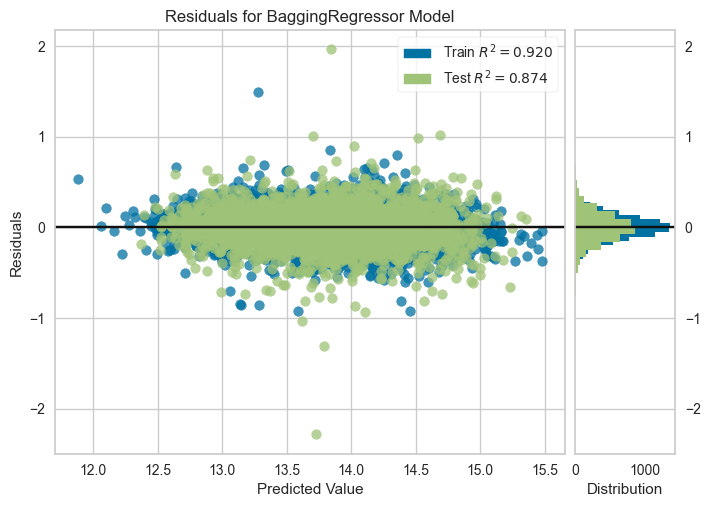

In [29]:
# plot residuals
plot_model(bagged_catboost, plot = 'residuals')

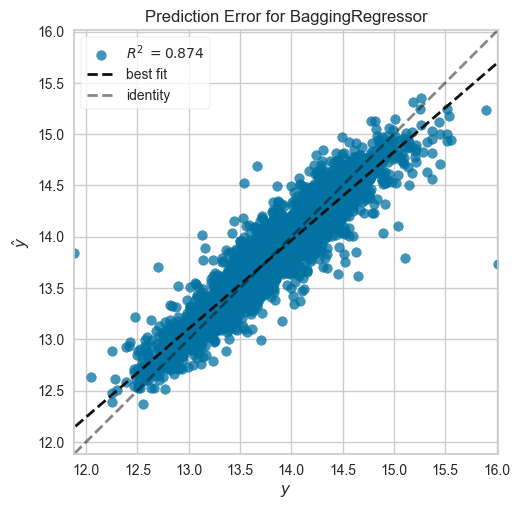

In [30]:
# plot error
plot_model(bagged_catboost, plot = 'error')

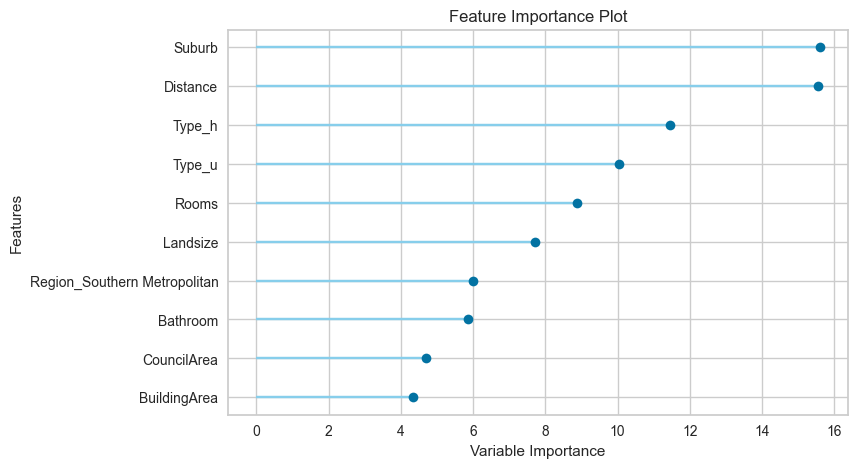

In [31]:
# plot feature importance
plot_model(tuned_best, plot = 'feature')

In [32]:
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [33]:
# predict on test set
holdout_pred = predict_model(bagged_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1377,0.0359,0.1895,0.8744,0.0128,0.0100


In [34]:
# show predictions df
holdout_pred.head()

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Region,Price,prediction_label
5799,Endeavour Hills,4,h,SP,28.5,4,2,2.0,669,165.0,1980.0,Casey,South-Eastern Metropolitan,13.345509,13.478368
10596,Airport West,3,h,PI,13.5,3,1,1.0,585,NaN,NaN,Moonee Valley,Western Metropolitan,13.487008,13.410303
7471,Rosanna,3,h,S,11.4,3,2,1.0,323,142.0,2015.0,Banyule,Eastern Metropolitan,13.827440,13.706012
2308,Hawthorn,3,h,S,4.6,3,1,1.0,342,130.0,1900.0,Boroondara,Southern Metropolitan,14.353173,14.372606
2602,Kensington,3,t,S,3.4,3,2,2.0,0,120.0,1999.0,Melbourne,Northern Metropolitan,13.781955,13.787096


In [35]:
final_model = finalize_model(bagged_catboost)

In [36]:
# save pipeline
save_model(final_model, 'pipeline1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Rooms', 'Distance', 'Bedroom2',
                                              'Bathroom', 'Car', 'Landsize',
                                              'BuildingArea', 'YearBuilt'],
                                     transformer=SimpleImputer(strategy='median'))),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Suburb', 'Type', 'Method',
                                              'Region', 'CouncilArea'],
                                     transformer=SimpleImput...
                                                                     'Method',
                                                                     'Region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                

In [37]:
# load pipeline
loaded_best_pipeline = load_model('pipeline1')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\edwar\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Rooms', 'Distance', 'Bedroom2',
                                             'Bathroom', 'Car', 'Landsize',
                                             'BuildingArea', 'YearBuilt'],
                                    transformer=SimpleImputer(strategy='median'))),
                ('categorical_imputer',
                 TransformerWrapper(include=['Suburb', 'Type', 'Method',
                                             'Region...
                                                                    'Method',
                                                                    'Region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Suburb', 'CouncilArea'],
                                    transformer=TargetEncoder(cols=['Suburb',
                                                                    'CouncilArea'],
                                                              handle_missing='return_nan'))),
                ('actual_estimator',
                 BaggingRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x00000192462F1780>,
                                  random_state=123))])